# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
from pathlib import Path
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\EPalmer\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
import sys
if "../lib" not in sys.path:
    print("Adding '../lib' to the path")
    sys.path.append("../lib")
import pandasPalmer as pp
import NLTK.fns as nl
import Classification.fns as cls


Adding '../lib' to the path


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EPalmer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\EPalmer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\EPalmer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\EPalmer\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
# Read your api key environment variable
if load_dotenv():
    api_key = os.getenv("NEWS_API_KEY")
    if type(api_key) == str:
        print("The Key has been loaded")
    else:
        print("FAILED TO LOAD THE NEWS API KEY !!!!!!!!!!!!")


The Key has been loaded


In [5]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [6]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(
    q="bitcoin"
    , language="en"
)
bitcoin_news["articles"][0]

{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Khari Johnson',
 'title': 'Why Not Use Self-Driving Cars as Supercomputers?',
 'description': 'Autonomous vehicles use the equivalent of 200 laptops to get around. Some want to tap that computing power to decode viruses or mine bitcoin.',
 'url': 'https://www.wired.com/story/use-self-driving-cars-supercomputers/',
 'urlToImage': 'https://media.wired.com/photos/60f081b4c147fe7a1a367362/191:100/w_1280,c_limit/Business-Autonomous-Vehicles-Supercomputers-1201885684.jpg',
 'publishedAt': '2021-07-19T11:00:00Z',
 'content': 'Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars]'}

In [64]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(
    q="ethereum"
    , language="en"
)
ethereum_news["articles"][0]["content"]

'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars]'

In [8]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_news_df = nl.Create_News_df(bitcoin_news["articles"], "en")
bitcoin_news_df = nl.Attach_Sentiment_Scores_2_df(bitcoin_news_df, txt_cols=["title","description","text"])
bitcoin_news_df.head()

,author,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,...,description_compound,description_pos,description_neu,description_neg,description_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,Khari Johnson,Why Not Use Self-Driving Cars as Supercomputers?,Autonomous vehicles use the equivalent of 200 ...,"Like Dogecoin devotees, the mayor of Reno, and...",2021-07-19,en,0.0000,0.000,1.000,0.000,...,0.0772,0.053,0.947,0.000,1,0.6908,0.178,0.822,0.000,1
1,Richard Lawler,Kaseya ransomware attackers demand $70 million...,Three days after ransomware attackers hijacked...,Filed under:\r\nThe supply chain attack has re...,2021-07-05,en,-0.8126,0.000,0.517,0.483,...,-0.7845,0.000,0.823,0.177,-1,-0.5719,0.111,0.705,0.184,-1
2,https://www.facebook.com/bbcnews,Gang behind huge cyber-attack demands $70m in ...,"The authors of a ""colossal"" ransomware attack ...",image copyrightGetty Images\r\nThe gang behind...,2021-07-05,en,0.3182,0.247,0.753,0.000,...,-0.5574,0.000,0.787,0.213,-1,-0.6124,0.000,0.857,0.143,-1
3,Richard Dal Porto,Daily Crunch: Bitcoin ‘is a big part of our fu...,"Hello friends and welcome to Daily Crunch, bri...",To get a roundup of TechCrunchs biggest and mo...,2021-07-23,en,0.0000,0.000,1.000,0.000,...,0.8016,0.313,0.687,0.000,1,0.6240,0.127,0.873,0.000,1
4,Lucas Matney,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,While retail investors grew more comfortable b...,2021-07-14,en,0.0000,0.000,1.000,0.000,...,0.7264,0.135,0.865,0.000,1,0.7264,0.164,0.836,0.000,1


In [9]:
# Create the Ethereum sentiment scores DataFrame
ethereum_news_df = nl.Create_News_df(ethereum_news["articles"], "en")
ethereum_news_df = nl.Attach_Sentiment_Scores_2_df(ethereum_news_df, txt_cols=["title","description","text"])
ethereum_news_df.head()

,author,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,...,description_compound,description_pos,description_neu,description_neg,description_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,Connie Loizos,"Crypto investors like Terraform Labs so much, ...",There are many blockchain platforms competing ...,There are many blockchain platforms competing ...,2021-07-16,en,0.4703,0.253,0.747,0.0,...,0.3612,0.059,0.941,0.000,1,0.3612,0.075,0.925,0.000,1
1,Lucas Matney,Tenderly raises $15.3M to help Ethereum develo...,Blockchain infrastructure startups are heating...,Blockchain infrastructure startups are heating...,2021-07-29,en,0.6705,0.379,0.621,0.0,...,-0.2411,0.000,0.951,0.049,-1,-0.2411,0.000,0.939,0.061,-1
2,Lucas Matney,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,While retail investors grew more comfortable b...,2021-07-14,en,0.0000,0.000,1.000,0.0,...,0.7264,0.135,0.865,0.000,1,0.7264,0.164,0.836,0.000,1
3,Reuters,Ether near two-month high ahead of major proto...,Ether held near two-month highs on Thursday a...,"HONG KONG, Aug 5 (Reuters) - Ether held near t...",2021-08-05,en,0.0000,0.000,1.000,0.0,...,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0
4,Lisa Mattackal,"Upgrades, ESG, DeFi usage to help ether outpac...",The Ethereum platform's potential applications...,Representations of cryptocurrencies Bitcoin an...,2021-08-03,en,0.4019,0.197,0.803,0.0,...,0.1280,0.087,0.841,0.071,1,0.0000,0.000,1.000,0.000,0


In [10]:
# Describe the Bitcoin Sentiment
bitcoin_news_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,description_compound,description_pos,description_neu,description_neg,description_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.033270,0.05700,0.864500,0.078500,-0.050000,0.001555,0.069000,0.843100,0.087950,0.000000,-0.019345,0.058500,0.881750,0.059750,0.050000
std,0.290540,0.10632,0.174367,0.135392,0.686333,0.515156,0.077693,0.102061,0.108026,0.973329,0.484055,0.058633,0.101771,0.090311,0.887041
min,-0.812600,0.00000,0.458000,0.000000,-1.000000,-0.812600,0.000000,0.619000,0.000000,-1.000000,-0.827100,0.000000,0.653000,0.000000,-1.000000
25%,-0.056575,0.00000,0.760500,0.000000,-0.250000,-0.405525,0.000000,0.773000,0.000000,-1.000000,-0.405525,0.000000,0.836000,0.000000,-1.000000
50%,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.060500,0.844000,0.033000,0.000000,0.000000,0.056000,0.906000,0.000000,0.000000
75%,0.000000,0.03325,1.000000,0.194750,0.000000,0.435300,0.100250,0.923750,0.156750,1.000000,0.315000,0.092500,0.940000,0.088250,1.000000
max,0.492700,0.32800,1.000000,0.483000,1.000000,0.801600,0.313000,1.000000,0.381000,1.000000,0.726400,0.178000,1.000000,0.287000,1.000000


In [11]:
# Describe the Ethereum Sentiment
ethereum_news_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,description_compound,description_pos,description_neu,description_neg,description_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.00000
mean,0.151575,0.093500,0.890550,0.015950,0.35000,0.278580,0.075250,0.915800,0.008900,0.500000,0.209565,0.063750,0.922800,0.01345,0.35000
std,0.244110,0.120641,0.118174,0.050501,0.67082,0.322368,0.079949,0.082997,0.022031,0.606977,0.331383,0.075861,0.081637,0.02766,0.67082
min,-0.296000,0.000000,0.621000,0.000000,-1.00000,-0.241100,0.000000,0.781000,0.000000,-1.000000,-0.340000,0.000000,0.782000,0.00000,-1.00000
25%,0.000000,0.000000,0.800500,0.000000,0.00000,0.000000,0.000000,0.839000,0.000000,0.000000,0.000000,0.000000,0.842750,0.00000,0.00000
50%,0.000000,0.000000,0.909000,0.000000,0.00000,0.234000,0.070500,0.929500,0.000000,1.000000,0.000000,0.000000,0.933500,0.00000,0.00000
75%,0.401900,0.199500,1.000000,0.000000,1.00000,0.541500,0.129000,1.000000,0.000000,1.000000,0.528675,0.149250,1.000000,0.00000,1.00000
max,0.670500,0.379000,1.000000,0.196000,1.00000,0.765000,0.219000,1.000000,0.071000,1.000000,0.771700,0.194000,1.000000,0.07200,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum with a text sentiment of 0.350

Q: Which coin had the highest compound score?

A: Ethereum with a maximum compound score of 0.771700 and an average of 0.209565

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EPalmer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\EPalmer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\EPalmer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
additional_stop_words = ['char','…','get','well','hello']
sw = sw.union(set(additional_stop_words))

In [14]:
# Complete the tokenizer function
def tokenizer(text,Return_string=False):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    # https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string
    text = text.translate(str.maketrans('', '', punctuation))

    # Create a tokenized list of the words
    words = word_tokenize(text)

    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]

    # Convert the words to lowercase
    output = [word.lower() for word in lem]

    # Remove the stop words
    tokens = [word for word in output if word not in sw]

    if Return_string:
        return ",".join(tokens)
    else:
        return tokens

#nl.tokenizer("This ole man he played one he Played. Knick Knack Paddy wack.", Post_Processor=nl.word_count)

In [15]:
# Create a new tokens column for Bitcoin
str_tokenizer = lambda x: tokenizer(x, Return_string=True)

bitcoin_news_df['text_tokens'] = bitcoin_news_df.text.apply(str_tokenizer)
bitcoin_news_df.head(2)

,author,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,...,description_pos,description_neu,description_neg,description_sent,text_compound,text_pos,text_neu,text_neg,text_sent,text_tokens
0,Khari Johnson,Why Not Use Self-Driving Cars as Supercomputers?,Autonomous vehicles use the equivalent of 200 ...,"Like Dogecoin devotees, the mayor of Reno, and...",2021-07-19,en,0.0000,0.0,1.000,0.000,...,0.053,0.947,0.000,1,0.6908,0.178,0.822,0.000,1,"like,dogecoin,devotee,mayor,reno,leader,el,sal..."
1,Richard Lawler,Kaseya ransomware attackers demand $70 million...,Three days after ransomware attackers hijacked...,Filed under:\r\nThe supply chain attack has re...,2021-07-05,en,-0.8126,0.0,0.517,0.483,...,0.000,0.823,0.177,-1,-0.5719,0.111,0.705,0.184,-1,"filed,supply,chain,attack,ha,reached,thousand,..."


In [16]:
# Create a new tokens column for Ethereum
ethereum_news_df['text_tokens'] = ethereum_news_df.text.apply(str_tokenizer)
ethereum_news_df.head(2)

,author,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,...,description_pos,description_neu,description_neg,description_sent,text_compound,text_pos,text_neu,text_neg,text_sent,text_tokens
0,Connie Loizos,"Crypto investors like Terraform Labs so much, ...",There are many blockchain platforms competing ...,There are many blockchain platforms competing ...,2021-07-16,en,0.4703,0.253,0.747,0.0,...,0.059,0.941,0.000,1,0.3612,0.075,0.925,0.000,1,"many,blockchain,platform,competing,investor,’,..."
1,Lucas Matney,Tenderly raises $15.3M to help Ethereum develo...,Blockchain infrastructure startups are heating...,Blockchain infrastructure startups are heating...,2021-07-29,en,0.6705,0.379,0.621,0.0,...,0.000,0.951,0.049,-1,-0.2411,0.000,0.939,0.061,-1,"blockchain,infrastructure,startup,heating,indu..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

In [19]:
# Generate the Bitcoin N-grams where N=2
all_articles_bit = " ".join(bitcoin_news_df.text_tokens).replace(',',' ')
nl.Create_Bi_grams_df(all_articles_bit)

,word,count
0,"(illustration, taken)",5
1,"(reuters, bitcoin)",3
2,"(representation, virtual)",3
3,"(virtual, currency)",3
4,"(currency, bitcoin)",3
...,...,...
383,"(monday, denied)",1
384,"(denied, medium)",1
385,"(medium, report)",1
386,"(report, saying)",1


In [20]:
# Generate the Ethereum N-grams where N=2
all_articles_eth = " ".join(ethereum_news_df.text_tokens).replace(',',' ')
nl.Create_Bi_grams_df(all_articles_eth)

,word,count
0,"(bitcoin, ethereum)",4
1,"(illustration, taken)",4
2,"(2021, reutersdado)",4
3,"(cryptocurrency, ethereum)",4
4,"(cryptocurrencies, bitcoin)",3
...,...,...
355,"(maker, tesla)",1
356,"(tesla, inc)",1
357,"(inc, tslao)",1
358,"(tslao, w…)",1


In [21]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [39]:
# Use token_count to get the top 10 words for Bitcoin

token_count(tokenizer(all_articles_bit), N=10)

[('bitcoin', 12),
 ('attack', 7),
 ('reuters', 7),
 ('ha', 6),
 ('illustration', 6),
 ('reutersdado', 6),
 ('july', 5),
 ('2021', 5),
 ('taken', 5),
 ('ransomware', 4)]

In [40]:
# Use token_count to get the top 10 words for Ethereum
token_count(tokenizer(all_articles_eth), N=10)

[('ethereum', 16),
 ('2021', 8),
 ('blockchain', 5),
 ('cryptocurrencies', 5),
 ('bitcoin', 5),
 ('network', 5),
 ('cryptocurrency', 5),
 ('ha', 4),
 ('reuters', 4),
 ('ether', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

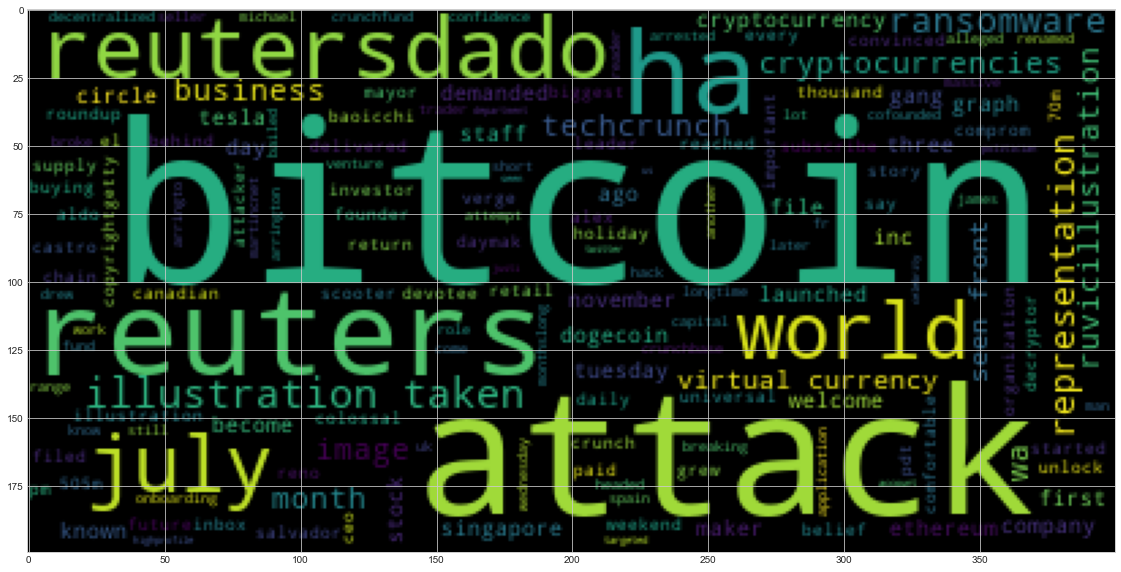

In [43]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(all_articles_bit)
plt.imshow(wc)


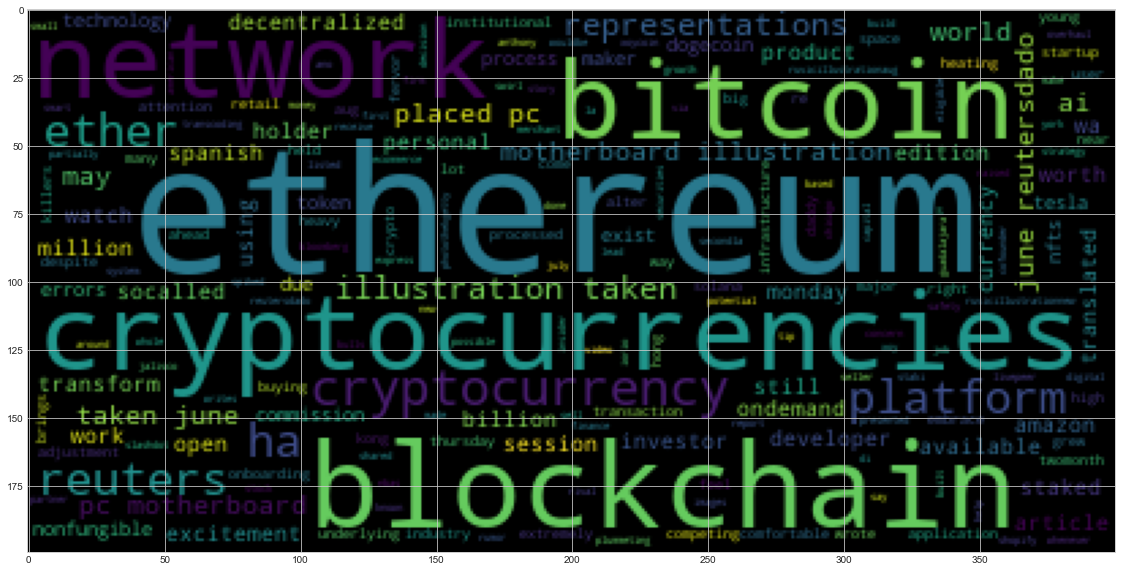

In [44]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(all_articles_eth)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [45]:
import spacy
from spacy import displacy

In [28]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [46]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [65]:
# Concatenate all of the Bitcoin text together
all_articles_bit = " ".join(bitcoin_news_df.text)

In [66]:
# Run the NER processor on all of the text
doc_bit = nlp(all_articles_bit)

# Add a title to the document
doc_bit.user_data["title"] = "Bitcoin Named Entity Visualization"

In [67]:
# Render the visualization
displacy.render(doc_bit, style="ent")

In [68]:
# List all Entities


---

### Ethereum NER

In [70]:
# Concatenate all of the Ethereum text together
all_articles_eth = " ".join(ethereum_news_df.text)

In [73]:
# Run the NER processor on all of the text
doc_eth = nlp(all_articles_eth)


# Add a title to the document
doc_bit.user_data["title"] = "Ethereum Named Entity Visualization"

In [36]:
# Render the visualization
# YOUR CODE HERE!

In [37]:
# List all Entities
# YOUR CODE HERE!

---